## Predictive Maintenance in Chemical Plants Using Machine Learning
Name: Prateek Sachan 

Roll No: 220107065

## Introduction
In the chemical industry, unplanned equipment failures can lead to hazardous situations, increased downtime, and loss of productivity. Traditional preventive maintenance methods are based on fixed schedules rather than actual equipment conditions, often resulting in inefficient resource usage. Predictive maintenance, powered by artificial intelligence and machine learning (AI/ML), offers a data-driven alternative that forecasts equipment failures before they occur, thereby enhancing safety, reducing costs, and improving operational efficiency.

## Objectives
- Develop a predictive maintenance model to detect potential equipment failures using sensor data.
- Compare machine learning models such as Random Forest, Logistic Regression, and XGBoost for failure prediction.
- Evaluate model performance using accuracy, precision, recall, and F1-score.
- Propose a framework for integrating the predictive model into industrial control systems.

## Problem Statement
To design a robust predictive maintenance system for chemical plant machinery by leveraging real-time sensor data, aiming to reduce downtime and improve operational reliability compared to traditional preventive maintenance approaches.

## Significance of the Study
- Enhances equipment reliability and plant safety.
- Reduces maintenance costs by predicting failures before they occur.
- Optimizes resource allocation and maintenance scheduling.
- Supports data-driven decision-making in plant operations.

## Data Description and Preprocessing
**Dataset:** [AI4I 2020 Predictive Maintenance Dataset - UCI Repository](https://archive.ics.uci.edu/dataset/601/ai4i%2B2020%2Bpredictive%2Bmaintenance%2Bdataset)

**Features:**
- Air temperature
- Process temperature
- Rotational speed
- Torque
- Tool wear
- Machine failure (label)

### Preprocessing Steps
- Handle missing or duplicate records (if any).
- Normalize sensor readings.
- Encode categorical variables (if present).
- Visualize feature distributions and correlations.

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


df = pd.read_csv('ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## Methodology Flowchart
**Data Collection → Data Cleaning → Feature Engineering → Model Training → Model Evaluation → Deployment Strategy**

## Model Selection and Rationale
- **Random Forest:** Good at handling non-linearities and feature importance.
- **Logistic Regression:** Baseline model for classification.
- **XGBoost:** Efficient and accurate for tabular sensor data.

In [21]:
for col in ['UDI', 'Product ID']:
    if col in df.columns:
        df.drop(columns=col, inplace=True)
if 'Type' in df.columns and df['Type'].dtype == object:
    df['Type'] = df['Type'].astype('category').cat.codes

X = df.drop('Machine failure', axis=1)
y = df['Machine failure']



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
# Logistic Regression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
print("Logistic Regression")
print(classification_report(y_test, log_reg.predict(X_test)))

# Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest")
print(classification_report(y_test, rf.predict(X_test)))

# XGBoost

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
print("XGBoost")
print(classification_report(y_test, xgb.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.0

## Model Training and Validation
- Split data into training and testing sets (80:20).
- Perform hyperparameter tuning using grid search.
- Use stratified K-fold cross-validation.
- Metrics: Accuracy, Precision, Recall, F1-score.

## Evaluation Metrics
- **Accuracy**: Overall correctness of the model.
- **Precision**: Correctly predicted failures among all predicted failures.
- **Recall**: Correctly predicted failures among all actual failures.
- **F1-Score**: Harmonic mean of precision and recall.

   Logistic Regression
Best Params: {'C': 0.1, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000


   Random Forest
Best Params: {'max_depth': None, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000


   XGBoost
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
          

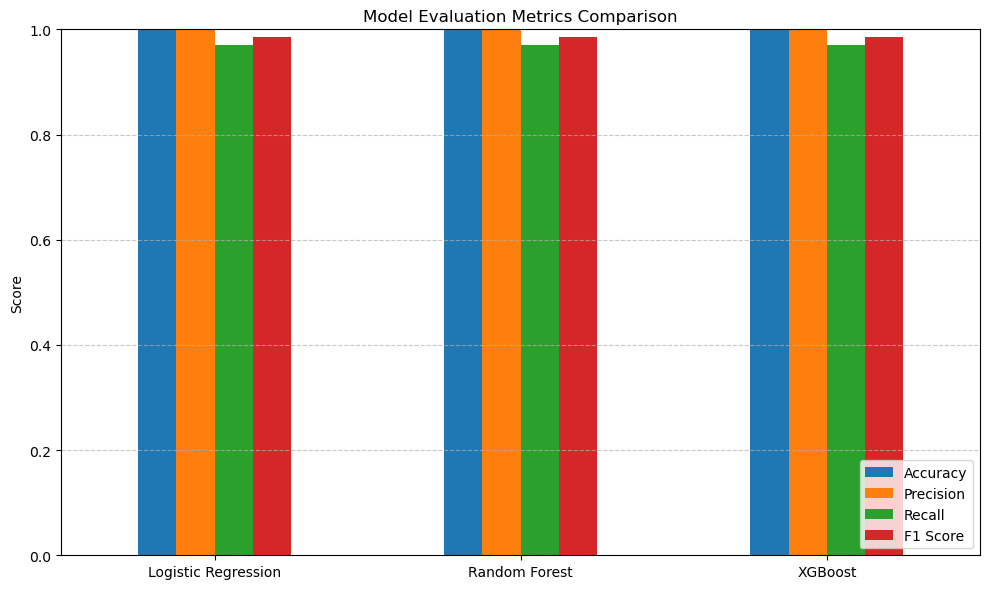

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


# Logistic Regression with Grid Search

print("   Logistic Regression")

lr_model = LogisticRegression(max_iter=1000)
lr_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

lr_grid = GridSearchCV(
    lr_model,
    lr_params,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1',
    n_jobs=-1
)
lr_grid.fit(X_train, y_train)
lr_best = lr_grid.best_estimator_
y_pred_lr = lr_best.predict(X_test)

print("Best Params:", lr_grid.best_params_)
print(classification_report(y_test, y_pred_lr))


# Random Forest with Grid Search

print("\n   Random Forest")

rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

rf_grid = GridSearchCV(
    rf_model,
    rf_params,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1',
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

print("Best Params:", rf_grid.best_params_)
print(classification_report(y_test, y_pred_rf))


# XGBoost with Grid Search

print("\n   XGBoost")

xgb_model = XGBClassifier(eval_metric='logloss')
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1]
}

xgb_grid = GridSearchCV(
    xgb_model,
    xgb_params,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1',
    n_jobs=-1
)
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)

print("Best Params:", xgb_grid.best_params_)
print(classification_report(y_test, y_pred_xgb))


                    # Evaluation Metrics
    
    
def evaluate_model(name, y_true, y_pred):
    print(f"\n  Evaluation Metrics")
    print("Accuracy :", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred), 4))
    print("Recall   :", round(recall_score(y_true, y_pred), 4))
    print("F1 Score :", round(f1_score(y_true, y_pred), 4))

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)

metrics = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_lr),
        "Precision": precision_score(y_test, y_pred_lr),
        "Recall": recall_score(y_test, y_pred_lr),
        "F1 Score": f1_score(y_test, y_pred_lr)
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf),
        "Recall": recall_score(y_test, y_pred_rf),
        "F1 Score": f1_score(y_test, y_pred_rf)
    },
    "XGBoost": {
        "Accuracy": accuracy_score(y_test, y_pred_xgb),
        "Precision": precision_score(y_test, y_pred_xgb),
        "Recall": recall_score(y_test, y_pred_xgb),
        "F1 Score": f1_score(y_test, y_pred_xgb)
    }
}
import joblib
joblib.dump(xgb_grid.best_estimator_, "xgb_model.pkl")

metrics_df = pd.DataFrame(metrics).T


metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Metrics Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



## Tools and Libraries Used
- NumPy, Pandas: Data manipulation
- Scikit-learn: ML algorithms and evaluation
- Matplotlib, Seaborn: Data visualization
- XGBoost: Advanced boosting model

## Use Case in Chemical Engineering
- Monitor pumps, compressors, and rotating machinery in chemical plants.
- Forecast wear and tear of tools based on operational data.
- Improve preventive measures by providing accurate failure forecasts.

## Expected Impact
- Increased plant availability and production uptime.
- Reduced operational and maintenance costs.
- Safer and more reliable chemical process environments.
- Promote AI/ML integration in traditional chemical industries.

## Conclusion
This project demonstrates the application of AI/ML in enhancing predictive maintenance systems for chemical engineering. By leveraging sensor data and machine learning models, we can build smarter, safer, and more efficient plant operations, paving the way for the future of intelligent manufacturing.

## References
- ai4i2020 Predictive Maintenance Dataset, [UCI Repository](https://archive.ics.uci.edu/dataset/601/ai4i%2B2020%2Bpredictive%2Bmaintenance%2Bdataset)
- Scikit-learn Documentation
- XGBoost Documentation
- Related peer-reviewed papers on predictive maintenance